In [1]:
import pandas as pd

# Load data
file_path = "C:/Users/unnat/Downloads/regression_analysis.csv" 
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime (Ensure your column name is correct)
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values(by='Date')

# Display first few rows
print(df.head())


          Date  Month_Num   Weekday AI_Platform   AI_Model_Version  \
32  2023-07-01          7  Saturday     ChatGPT        GPT-4-turbo   
107 2023-07-02          7    Sunday    DeepSeek  DeepSeek-Chat 1.5   
192 2023-07-03          7    Monday     ChatGPT        GPT-4-turbo   
109 2023-07-04          7   Tuesday     ChatGPT        GPT-4-turbo   
267 2023-07-07          7    Friday     ChatGPT        GPT-4-turbo   

     Active_Users  New_Users  Churned_Users  Old_Users  Daily_Churn_Rate  
32        1200000      60000          60000    1140000              0.05  
107        200000      20000           4000     180000              0.02  
192       1200000      60000          60000    1140000              0.05  
109       1200000      60000          60000    1140000              0.05  
267       1200000      60000          60000    1140000              0.05  


In [3]:
# Filter data for ChatGPT
chatgpt_data = df[df['AI_Platform'] == 'ChatGPT']

# Filter data for DeepSeek
deepseek_data = df[df['AI_Platform'] == 'DeepSeek']

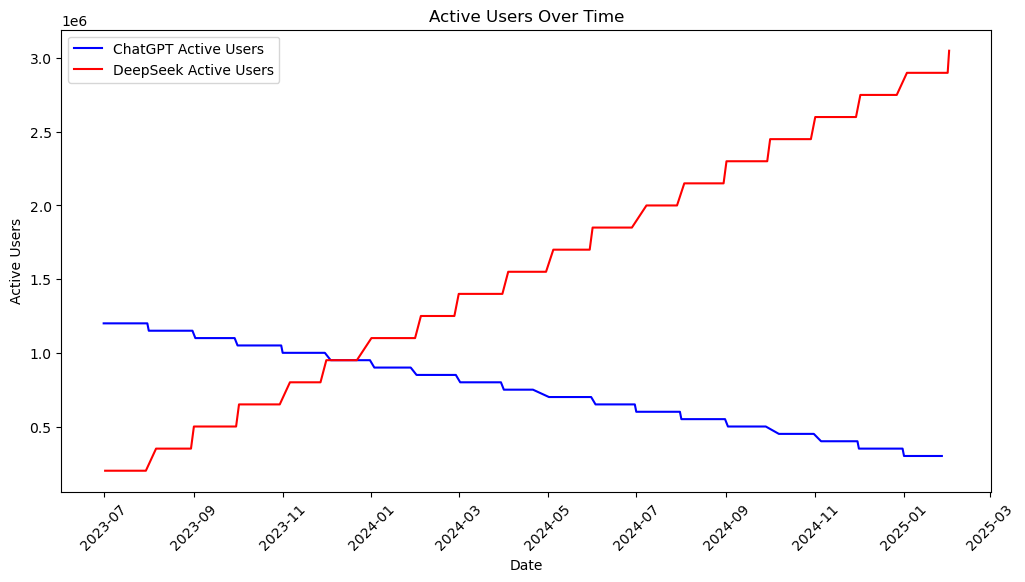

In [5]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Plot Active Users
plt.plot(chatgpt_data['Date'], chatgpt_data['Active_Users'], label="ChatGPT Active Users", color='blue')
plt.plot(deepseek_data['Date'], deepseek_data['Active_Users'], label="DeepSeek Active Users", color='red')

# Labels
plt.xlabel("Date")
plt.ylabel("Active Users")
plt.title("Active Users Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

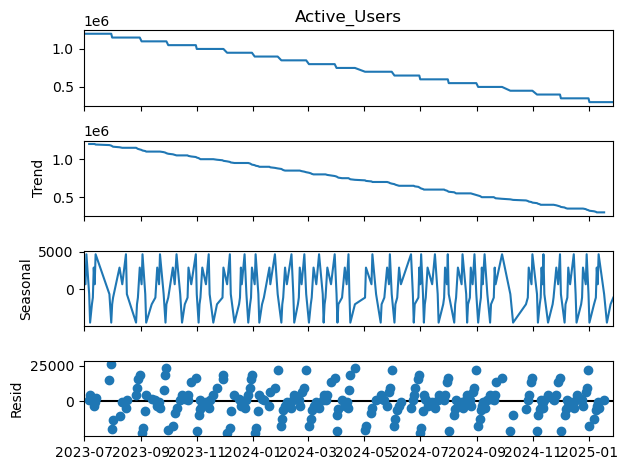

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose ChatGPT Active Users
decomp_chatgpt = seasonal_decompose(chatgpt_data.set_index('Date')['Active_Users'], model='additive', period=7)

# Plot decomposition
decomp_chatgpt.plot()
plt.show()

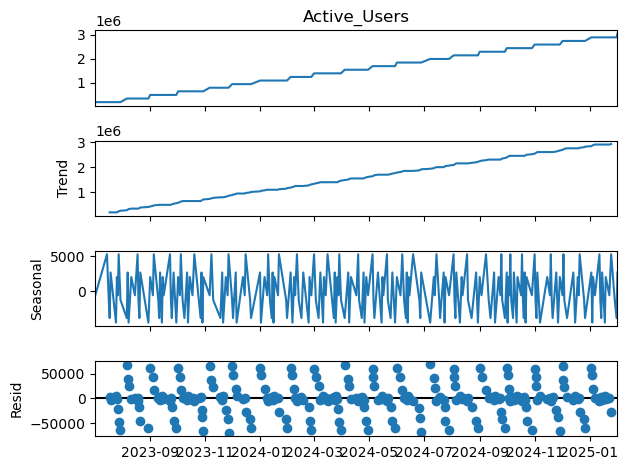

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose ChatGPT Active Users
decomp_deepseek = seasonal_decompose(deepseek_data.set_index('Date')['Active_Users'], model='additive', period=7)

# Plot decomposition
decomp_deepseek.plot()
plt.show()

In [11]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/13.3 MB 4.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/13.3 MB 3.8 MB/s eta 0:00:04
   ------- -------------------------------- 2.4/13.3 MB 4.3 MB/s eta 0:00:03
   ---------- ----------------------------- 3.4/13.3 MB 4.4 MB/s eta 0:00:03
   ------------- -------------------------- 4.5/13.3 MB 4.4 MB/s eta 0:00:03
   -------------- ------------------------- 5.0/13.3 MB 4.4 MB/s eta 0:00:02
   ----------------- ---------------------- 5.8/13.3 MB 4.1 MB/s eta 0:00:02
   ------------------- -------------------- 6.6/13.3 MB 4.0 MB/s eta 0:00:02
   --------------------- ------------------ 7.1/13.3 MB 4.0 MB/s eta 0:00:02
   ---------------------- ----------------- 7.6/13.3 MB 3.8 MB/s eta 0:00:02
   ----------------------- ---------------- 7.9/13.3 MB 3.7 MB/s eta 0:00:02
   ----------------------- ---------------- 7.9/13.3 MB 3.7 MB/s eta 0:00:02
   ---

22:22:44 - cmdstanpy - INFO - Chain [1] start processing
22:22:44 - cmdstanpy - INFO - Chain [1] done processing


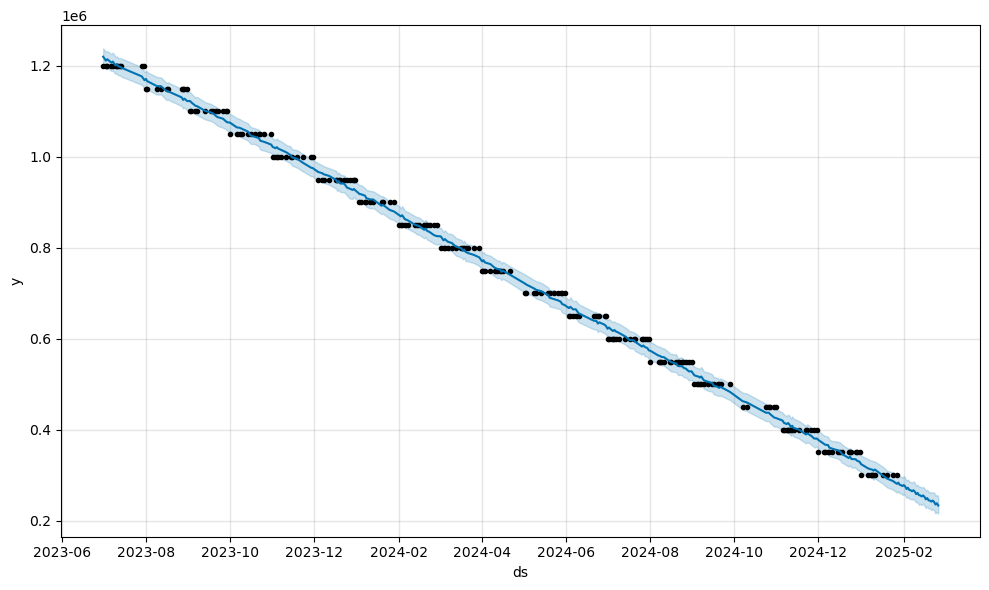

In [21]:
from prophet import Prophet

# Prepare ChatGPT Data
chatgpt_forecast = chatgpt_data[['Date', 'Active_Users']].rename(columns={'Date': 'ds', 'Active_Users': 'y'})

# Initialize Prophet Model
model = Prophet()
model.fit(chatgpt_forecast)

# Create future dates (next 30 days)
future = model.make_future_dataframe(periods=30)

# Predict
forecast = model.predict(future)

# Plot Forecast
model.plot(forecast)
plt.show()

In [25]:
# Display forecasted values
# yhat = Predicted values and yhat_lower and upper are the confidence intervals
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
251,2025-02-17,246894.421498,227554.029341,266139.581280
252,2025-02-18,249673.865276,231150.104517,267909.949167
253,2025-02-19,244709.087393,226669.357370,262701.147959
254,2025-02-20,244128.422014,226500.610864,263431.765408
255,2025-02-21,241914.600160,222964.919223,260911.853629
256,2025-02-22,244185.722427,226111.281106,262343.848673
257,2025-02-23,241122.636928,222234.062006,261900.597757
258,2025-02-24,235527.049859,215832.880266,254905.756332
259,2025-02-25,238306.493636,219254.824038,256970.331744
260,2025-02-26,233341.715753,215872.420029,252554.791423


22:18:24 - cmdstanpy - INFO - Chain [1] start processing
22:18:24 - cmdstanpy - INFO - Chain [1] done processing


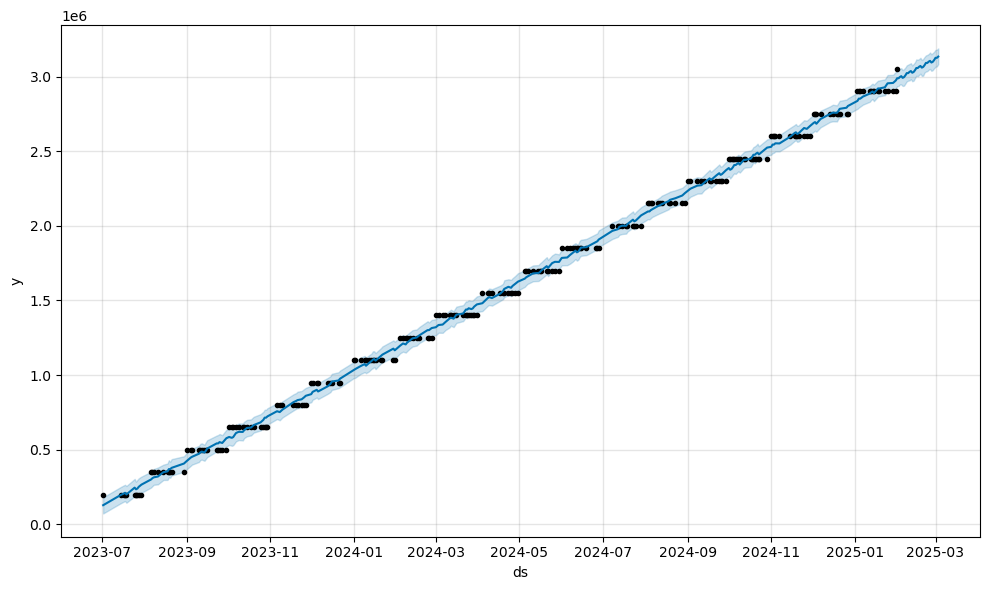

In [15]:
from prophet import Prophet

# Prepare Deepseek Data
deepseek_forecast = deepseek_data[['Date', 'Active_Users']].rename(columns={'Date': 'ds', 'Active_Users': 'y'})

# Initialize Prophet Model
model = Prophet()
model.fit(deepseek_forecast)

# Create future dates (next 30 days)
future = model.make_future_dataframe(periods=30)

# Predict
forecast = model.predict(future)

# Plot Forecast
model.plot(forecast)
plt.show()

In [17]:
# Display forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
256,2025-02-22,3.091147e+06,3.033253e+06,3.141361e+06
257,2025-02-23,3.090775e+06,3.036156e+06,3.144615e+06
258,2025-02-24,3.099407e+06,3.045450e+06,3.150577e+06
259,2025-02-25,3.104898e+06,3.050480e+06,3.160558e+06
260,2025-02-26,3.093656e+06,3.037890e+06,3.148689e+06
261,2025-02-27,3.098547e+06,3.042905e+06,3.156939e+06
262,2025-02-28,3.110167e+06,3.055716e+06,3.165333e+06
263,2025-03-01,3.125320e+06,3.065142e+06,3.178179e+06
264,2025-03-02,3.124948e+06,3.067950e+06,3.179072e+06
265,2025-03-03,3.133581e+06,3.081823e+06,3.188167e+06
